In [1]:
import pandas as pd
import os
import numpy as np

In [77]:
df = pd.read_excel('Edison_dataset.xlsx', index_col=0) 

In [78]:
#df.drop('Finmo Submit Date', inplace=True, axis=1)

In [79]:
#df.drop('LeadSource', inplace=True, axis=1)

#### df

In [81]:
df.isnull().sum()

Finmo Submit Date                     46891
JumpstartFlag                             0
IsFirstTimeBuyer__c                       0
LoanAmount__c                          1705
Loan Amount (50k Bins)                 1495
LoanPurpose__c                            0
PropertyCity__c                       36563
PropertyPostalCode__c                 38313
PropertyProvince__c                    7590
PurchasePrice__c                      26253
PurchaseTimeframe__c                  15004
SelfAssessedCreditRating__c           29594
Source                                   18
# of dials to allocate                39976
LeadDate                                  0
AllocateDate                          17750
Credit FirstStatusDate                37251
PAL FirstStatusDate                   45900
Presentation FirstStatusDate          46886
ApplicationStarted FirstStatusDate    45417
SubmitToLender FirstStatusDate        45543
dtype: int64

In [82]:
df.shape

(47511, 21)

In [83]:
#create new columns in df to find of the difference between stages in the application process
df['Lead_Allocate_DD']=df['AllocateDate']-df['LeadDate']
df['Allocate_Credit_DD']=df['Credit FirstStatusDate']-df['AllocateDate']
df['Credit_PAL_DD']=df['PAL FirstStatusDate']-df['Credit FirstStatusDate']
df['PAL_Present_DD']=df['Presentation FirstStatusDate']-df['PAL FirstStatusDate']
df['Present_App_DD']=df['ApplicationStarted FirstStatusDate']-df['Presentation FirstStatusDate']
df['App_Submit_DD']=df['SubmitToLender FirstStatusDate']-df['ApplicationStarted FirstStatusDate']

In [84]:
df['Lead_Allocate_DD']=df['Lead_Allocate_DD']/np.timedelta64(1,'D')
df['Allocate_Credit_DD']=df['Allocate_Credit_DD']/np.timedelta64(1,'D')
df['Credit_PAL_DD']=df['Credit_PAL_DD']/np.timedelta64(1,'D')
df['PAL_Present_DD']=df['PAL_Present_DD']/np.timedelta64(1,'D')
df['Present_App_DD']=df['Present_App_DD']/np.timedelta64(1,'D')
df['App_Submit_DD']=df['App_Submit_DD']/np.timedelta64(1,'D')

In [85]:
# making a list of date variables to convert to either 1 or -1 if they are non-null or null respecctively.
date_columns = ['Finmo Submit Date','LeadDate','AllocateDate','Credit FirstStatusDate','PAL FirstStatusDate','Presentation FirstStatusDate','ApplicationStarted FirstStatusDate','SubmitToLender FirstStatusDate']

In [86]:
# convert to either 1 or -1 if they are non-null or null respecctively.
for i in date_columns:
    df[i].loc[~df[i].isnull()] = 1  # not nan
    df[i].loc[df[i].isnull()] = -1   # nan

C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [87]:
# making a list of date_difference variables to convert to -1 if they are null.
dd_columns=['Lead_Allocate_DD','Allocate_Credit_DD','Credit_PAL_DD','PAL_Present_DD','Present_App_DD','App_Submit_DD']

In [88]:
# to convert to -1 if they are null.
for j in dd_columns:
    df[j].loc[df[j].isnull()] = -1  # nan

In [89]:
# making a list of object variables to convert 'unknown' if they are null.
object_columns = ['PropertyCity__c','PropertyPostalCode__c','PropertyProvince__c','PurchaseTimeframe__c','SelfAssessedCreditRating__c','Source']

In [90]:
# to convert to 'unknown' if they are null.
for k in object_columns:
    df[k].loc[df[k].isnull()] = 'unknown'

In [91]:
# making a list of float variables to convert to -1 if they are null and converting them.
float_columns=['LoanAmount__c','Loan Amount (50k Bins)','PurchasePrice__c','# of dials to allocate']
for l in float_columns:
    df[l].loc[df[l].isnull()] = -1

In [92]:
#converting the categorical variables into categorical codes for the model to process

df['LoanPurpose__c']=df['LoanPurpose__c'].astype('category')
df['LoanPurpose__c']=df['LoanPurpose__c'].cat.codes
df['PropertyCity__c']=df['PropertyCity__c'].astype('category')
df['PropertyCity__c']=df['PropertyCity__c'].cat.codes
df['PropertyPostalCode__c']=df['PropertyPostalCode__c'].astype('category')
df['PropertyPostalCode__c']=df['PropertyPostalCode__c'].cat.codes
df['PurchaseTimeframe__c']=df['PurchaseTimeframe__c'].astype('category')
df['PurchaseTimeframe__c']=df['PurchaseTimeframe__c'].cat.codes
df['SelfAssessedCreditRating__c']=df['SelfAssessedCreditRating__c'].astype('category')
df['SelfAssessedCreditRating__c']=df['SelfAssessedCreditRating__c'].cat.codes
df['Source']=df['Source'].astype('category')
df['Source']=df['Source'].cat.codes
df['PropertyProvince__c']=df['PropertyProvince__c'].astype('category')
df['PropertyProvince__c']=df['PropertyProvince__c'].cat.codes

In [162]:
DD_less_than_neg_one = ['Lead_Allocate_DD','Allocate_Credit_DD','Credit_PAL_DD','PAL_Present_DD','Present_App_DD','App_Submit_DD']

In [166]:
for cols in DD_less_than_neg_one:
    df.drop(index=df[df[cols] <= -2].index,inplace=True)

In [168]:
df.shape

(47378, 27)

In [175]:
df.to_csv('Edision_cleaned.csv', encoding='utf-8', index=False)

In [176]:
# Differentiating Feature variables and target variable
feature_cols = ['Finmo Submit Date', 'JumpstartFlag', 'IsFirstTimeBuyer__c',
       'LoanAmount__c', 'Loan Amount (50k Bins)', 'LoanPurpose__c',
       'PropertyCity__c', 'PropertyPostalCode__c', 'PropertyProvince__c',
       'PurchasePrice__c', 'PurchaseTimeframe__c',
       'SelfAssessedCreditRating__c', 'Source', '# of dials to allocate',
       'LeadDate', 'AllocateDate', 'Credit FirstStatusDate',
       'PAL FirstStatusDate', 'Presentation FirstStatusDate',
       'ApplicationStarted FirstStatusDate',
       'Lead_Allocate_DD', 'Allocate_Credit_DD', 'Credit_PAL_DD',
       'PAL_Present_DD', 'Present_App_DD', 'App_Submit_DD']
x=df[feature_cols]
y=df['SubmitToLender FirstStatusDate']

In [177]:
# import libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [179]:


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [180]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9909244406922753


In [181]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9043   52]
 [  34  347]]
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      9095
           1       0.87      0.91      0.89       381

    accuracy                           0.99      9476
   macro avg       0.93      0.95      0.94      9476
weighted avg       0.99      0.99      0.99      9476



In [183]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
print("score on test: " + str(lr.score(x_test, y_test)))
print("score on train: "+ str(lr.score(x_train, y_train)))

score on test: 0.9597931616715913
score on train: 0.959131444250963


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


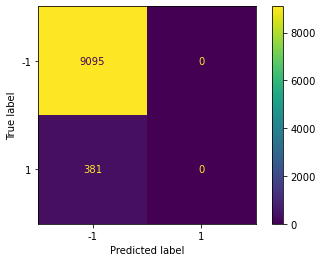

In [184]:
plot_confusion_matrix(lr,x_test,y_test)

In [185]:
# K-nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(x_train, y_train)
print("train shape: " + str(x_train.shape))

train shape: (37902, 26)


In [186]:
print("score on test: " + str(knn.score(x_test, y_test)))
print("score on train: "+ str(knn.score(x_train, y_train)))

score on test: 0.9762558041367666
score on train: 0.9794469948815366


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


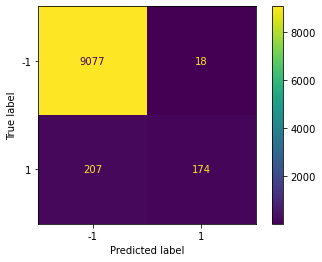

In [187]:
plot_confusion_matrix(knn,x_test,y_test)

In [188]:
# Support Vector Machine
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(x_train, y_train)
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

score on test: 0.9616926973406501
score on train: 0.9623502717534694


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


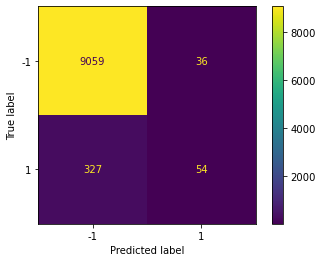

In [189]:
plot_confusion_matrix(svm,x_test,y_test)

In [190]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clff = DecisionTreeClassifier()
clff.fit(x_train, y_train)
print("score on test: "  + str(clff.score(x_test, y_test)))
print("score on train: " + str(clff.score(x_train, y_train)))

score on test: 0.9915576192486281
score on train: 0.9998416970080735


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


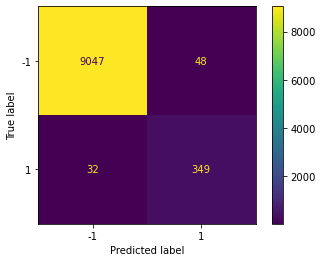

In [191]:
plot_confusion_matrix(clff,x_test,y_test)

In [192]:
#Bagging Decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(x_train, y_train)
print("score on test: " + str(bg.score(x_test, y_test)))
print("score on train: "+ str(bg.score(x_train, y_train)))

score on test: 0.9952511608273533
score on train: 0.9954092132341301


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


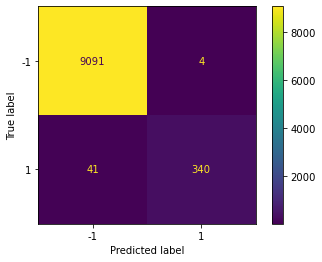

In [193]:
plot_confusion_matrix(bg,x_test,y_test)

In [194]:
# Boosting Decision Tree

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(x_train, y_train)
print("score on test: " + str(adb.score(x_test, y_test)))
print("score on train: "+ str(adb.score(x_train, y_train)))

score on test: 0.9947235120303926
score on train: 0.9938525671468524


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


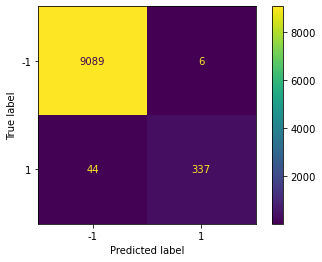

In [195]:
plot_confusion_matrix(adb,x_test,y_test)

In [196]:
# Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(x_train, y_train)
print("score on test: " + str(rf.score(x_test, y_test)))
print("score on train: "+ str(rf.score(x_train, y_train)))

score on test: 0.9948290417897847
score on train: 0.9921903857316237


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


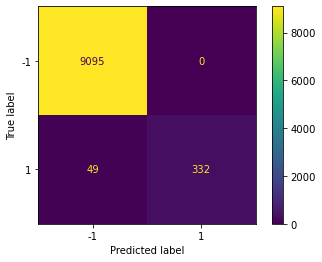

In [197]:
plot_confusion_matrix(rf,x_test,y_test)

In [198]:
# voting classifier

from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(x_train, y_train)
print("score on test: " + str(evc.score(x_test, y_test)))
print("score on train: "+ str(evc.score(x_train, y_train)))

C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


score on test: 0.9690797804981005
score on train: 0.9692892195662498


C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


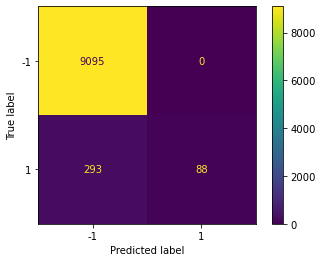

In [199]:
plot_confusion_matrix(evc,x_test,y_test)

In [200]:
import imblearn

In [201]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1)
x_sm,y_sm = smote.fit_resample(x_train,y_train)


In [202]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)

clf.fit(x_sm, y_sm)
y_pred = clf.predict_proba(x_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5171530029334569

C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


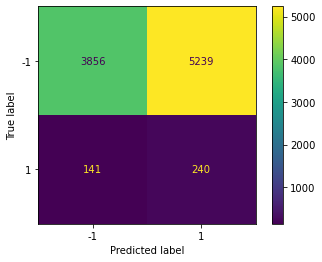

In [203]:
plot_confusion_matrix(clf,x_test,y_test)

In [204]:
# Over-Under Sampling

from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=12)
x_resampled, y_resampled = smote_tomek.fit_resample(x_train, y_train)

In [205]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=12)

clf.fit(x_resampled, y_resampled)
y_pred = clf.predict_proba(x_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5156007093395898

C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


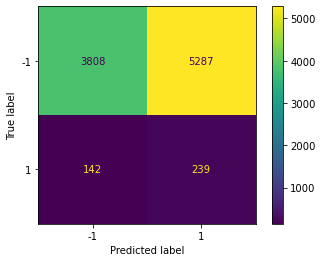

In [206]:
plot_confusion_matrix(clf,x_test,y_test)

In [207]:
# Undersampling
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
x_resampled, y_resampled = tl.fit_resample(x_train, y_train)

y_resampled.value_counts()

-1    36124
 1     1550
Name: SubmitToLender FirstStatusDate, dtype: int64

In [208]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=123)

clf.fit(x_resampled, y_resampled)
y_pred = clf.predict_proba(x_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.49864841661147496

C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


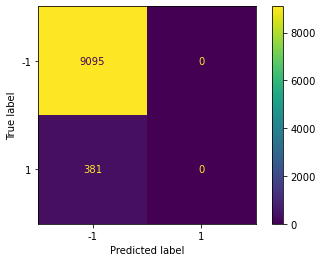

In [209]:
plot_confusion_matrix(clf,x_test,y_test)

In [210]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=14)
X_resampled, y_resampled = cc.fit_resample(x_train, y_train)

y_resampled.value_counts()

 1    1550
-1    1550
Name: SubmitToLender FirstStatusDate, dtype: int64

In [211]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=14)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(x_test)[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5163296726446852

C:\Users\KrishnaSurendra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


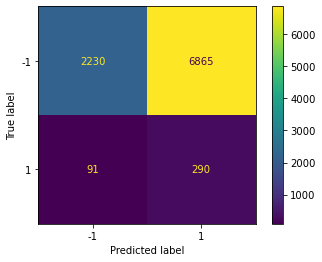

In [212]:
plot_confusion_matrix(clf,x_test,y_test)

In [218]:
df_submit = df[df['SubmitToLender FirstStatusDate']==1]

In [219]:
df_submit

,Finmo Submit Date,JumpstartFlag,IsFirstTimeBuyer__c,LoanAmount__c,Loan Amount (50k Bins),LoanPurpose__c,PropertyCity__c,PropertyPostalCode__c,PropertyProvince__c,PurchasePrice__c,...,PAL FirstStatusDate,Presentation FirstStatusDate,ApplicationStarted FirstStatusDate,SubmitToLender FirstStatusDate,Lead_Allocate_DD,Allocate_Credit_DD,Credit_PAL_DD,PAL_Present_DD,Present_App_DD,App_Submit_DD
Id,,,,,,,,,,,,,,,,,,,,,
1,-1,0,False,452500.0,350000.0,1,951,7528,6,-1.0,...,-1,-1,1,1,1.0,1.0,-1.0,-1.0,-1.0,0.0
61,-1,0,False,420000.0,400000.0,1,944,7528,6,-1.0,...,-1,-1,1,1,73.0,0.0,-1.0,-1.0,-1.0,0.0
89,-1,0,False,170000.0,150000.0,2,941,7528,6,1200000.0,...,-1,-1,1,1,0.0,0.0,-1.0,-1.0,-1.0,14.0
98,-1,0,False,900000.0,1050000.0,2,941,7528,10,1800000.0,...,-1,-1,1,1,1.0,0.0,-1.0,-1.0,-1.0,21.0
103,-1,0,False,610000.0,600000.0,1,941,7528,10,800000.0,...,-1,-1,1,1,3.0,0.0,-1.0,-1.0,-1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47461,-1,0,False,-1.0,250000.0,1,954,7528,10,-1.0,...,-1,-1,-1,1,0.0,0.0,-1.0,-1.0,-1.0,-1.0
47462,-1,0,False,-1.0,650000.0,0,954,7528,10,-1.0,...,1,-1,1,1,0.0,0.0,0.0,-1.0,-1.0,1.0
47463,-1,0,False,-1.0,300000.0,1,954,7528,10,-1.0,...,-1,1,1,1,0.0,0.0,-1.0,-1.0,1.0,1.0


In [220]:
df_not_submit = df[df['SubmitToLender FirstStatusDate']!=1]

In [221]:
df_not_submit

,Finmo Submit Date,JumpstartFlag,IsFirstTimeBuyer__c,LoanAmount__c,Loan Amount (50k Bins),LoanPurpose__c,PropertyCity__c,PropertyPostalCode__c,PropertyProvince__c,PurchasePrice__c,...,PAL FirstStatusDate,Presentation FirstStatusDate,ApplicationStarted FirstStatusDate,SubmitToLender FirstStatusDate,Lead_Allocate_DD,Allocate_Credit_DD,Credit_PAL_DD,PAL_Present_DD,Present_App_DD,App_Submit_DD
Id,,,,,,,,,,,,,,,,,,,,,
2,-1,0,False,908000.0,900000.0,0,950,7528,6,1135000.0,...,-1,-1,-1,-1,8.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1,0,False,65000.0,50000.0,1,949,7528,1,-1.0,...,-1,-1,-1,-1,78.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1,0,False,160000.0,150000.0,0,948,2994,6,-1.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1,0,False,800000.0,800000.0,0,948,3001,6,-1.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,-1,0,False,220000.0,200000.0,0,948,2993,6,-1.0,...,-1,-1,-1,-1,10.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47507,-1,0,False,-1.0,-1.0,0,954,7528,10,-1.0,...,-1,-1,-1,-1,0.0,0.0,-1.0,-1.0,-1.0,-1.0
47508,-1,0,False,-1.0,-1.0,0,954,7528,10,-1.0,...,-1,-1,-1,-1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
47509,-1,0,False,-1.0,-1.0,1,954,7528,10,-1.0,...,-1,1,-1,-1,0.0,0.0,-1.0,-1.0,-1.0,-1.0


In [222]:
df.shape

(47378, 27)

In [223]:
# Randomly sample 70% of your dataframe
df_percent = df_not_submit.sample(frac=0.042)

In [224]:
df_percent

,Finmo Submit Date,JumpstartFlag,IsFirstTimeBuyer__c,LoanAmount__c,Loan Amount (50k Bins),LoanPurpose__c,PropertyCity__c,PropertyPostalCode__c,PropertyProvince__c,PurchasePrice__c,...,PAL FirstStatusDate,Presentation FirstStatusDate,ApplicationStarted FirstStatusDate,SubmitToLender FirstStatusDate,Lead_Allocate_DD,Allocate_Credit_DD,Credit_PAL_DD,PAL_Present_DD,Present_App_DD,App_Submit_DD
Id,,,,,,,,,,,,,,,,,,,,,
27258,-1,0,False,760000.0,750000.0,0,954,7528,6,950000.0,...,-1,-1,-1,-1,1.0,0.0,-1.0,-1.0,-1.0,-1.0
30395,-1,0,False,200000.0,200000.0,1,954,7528,6,-1.0,...,-1,-1,-1,-1,1.0,0.0,-1.0,-1.0,-1.0,-1.0
34141,-1,0,True,390000.0,350000.0,0,954,7528,6,400000.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
36100,-1,0,False,400000.0,400000.0,2,954,7528,6,-1.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
32142,-1,0,False,639000.0,600000.0,1,954,7528,6,-1.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39354,-1,0,False,405000.0,400000.0,1,954,7528,6,-1.0,...,-1,-1,-1,-1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3204,-1,0,False,170000.0,150000.0,0,671,5409,0,-1.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
27199,-1,0,False,800000.0,800000.0,0,954,7528,6,1000000.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [227]:
#df_new = df_submit +df_percent
df_new = pd.concat([df_submit, df_percent])

In [241]:
df_new

,Finmo Submit Date,JumpstartFlag,IsFirstTimeBuyer__c,LoanAmount__c,Loan Amount (50k Bins),LoanPurpose__c,PropertyCity__c,PropertyPostalCode__c,PropertyProvince__c,PurchasePrice__c,...,PAL FirstStatusDate,Presentation FirstStatusDate,ApplicationStarted FirstStatusDate,SubmitToLender FirstStatusDate,Lead_Allocate_DD,Allocate_Credit_DD,Credit_PAL_DD,PAL_Present_DD,Present_App_DD,App_Submit_DD
Id,,,,,,,,,,,,,,,,,,,,,
1,-1,0,False,452500.0,350000.0,1,951,7528,6,-1.0,...,-1,-1,1,1,1.0,1.0,-1.0,-1.0,-1.0,0.0
61,-1,0,False,420000.0,400000.0,1,944,7528,6,-1.0,...,-1,-1,1,1,73.0,0.0,-1.0,-1.0,-1.0,0.0
89,-1,0,False,170000.0,150000.0,2,941,7528,6,1200000.0,...,-1,-1,1,1,0.0,0.0,-1.0,-1.0,-1.0,14.0
98,-1,0,False,900000.0,1050000.0,2,941,7528,10,1800000.0,...,-1,-1,1,1,1.0,0.0,-1.0,-1.0,-1.0,21.0
103,-1,0,False,610000.0,600000.0,1,941,7528,10,800000.0,...,-1,-1,1,1,3.0,0.0,-1.0,-1.0,-1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39354,-1,0,False,405000.0,400000.0,1,954,7528,6,-1.0,...,-1,-1,-1,-1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3204,-1,0,False,170000.0,150000.0,0,671,5409,0,-1.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
27199,-1,0,False,800000.0,800000.0,0,954,7528,6,1000000.0,...,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [246]:
df_new.sort_values(by='Id', ascending=True)
df_new.to_csv('Edison_random_sample.csv', encoding='utf-8')